## Import libraies

In [625]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load datasets

In [628]:
df=pd.read_csv('17-breast-cancer.csv')

In [630]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

## clean and prepare data

In [633]:
df.shape

(569, 32)

In [635]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [637]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [639]:
categorical_columns=df.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['diagnosis'], dtype='object')

In [641]:
df['diagnosis'].nunique()

2

In [643]:
df['diagnosis']=df['diagnosis'].map({'M':1, 'B':0})
df['diagnosis'].sample(6)

90     0
425    0
64     1
336    0
133    0
113    0
Name: diagnosis, dtype: int64

In [645]:
df.drop('id', axis=1, inplace=True)

In [647]:
df.shape[1]

31

In [649]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## EDA

In [652]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [654]:
df.describe().T

count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
diagnosis                  0.000000    0.000000     1.000000     1.00000  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.72000

In [656]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [658]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

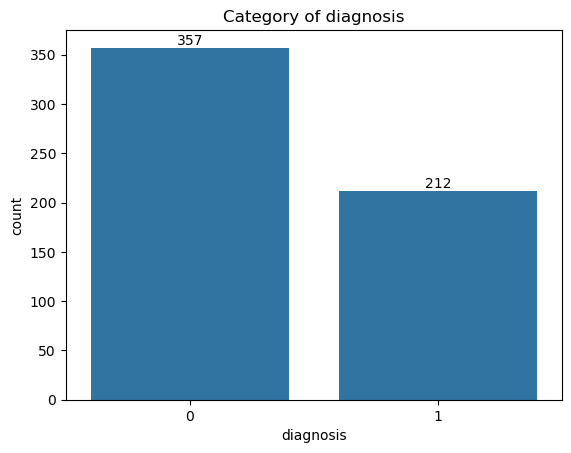

In [660]:
ax=sns.countplot(x=df['diagnosis'])
ax.bar_label(ax.containers[0])
plt.title('Category of diagnosis')
plt.show

In [661]:
df.corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

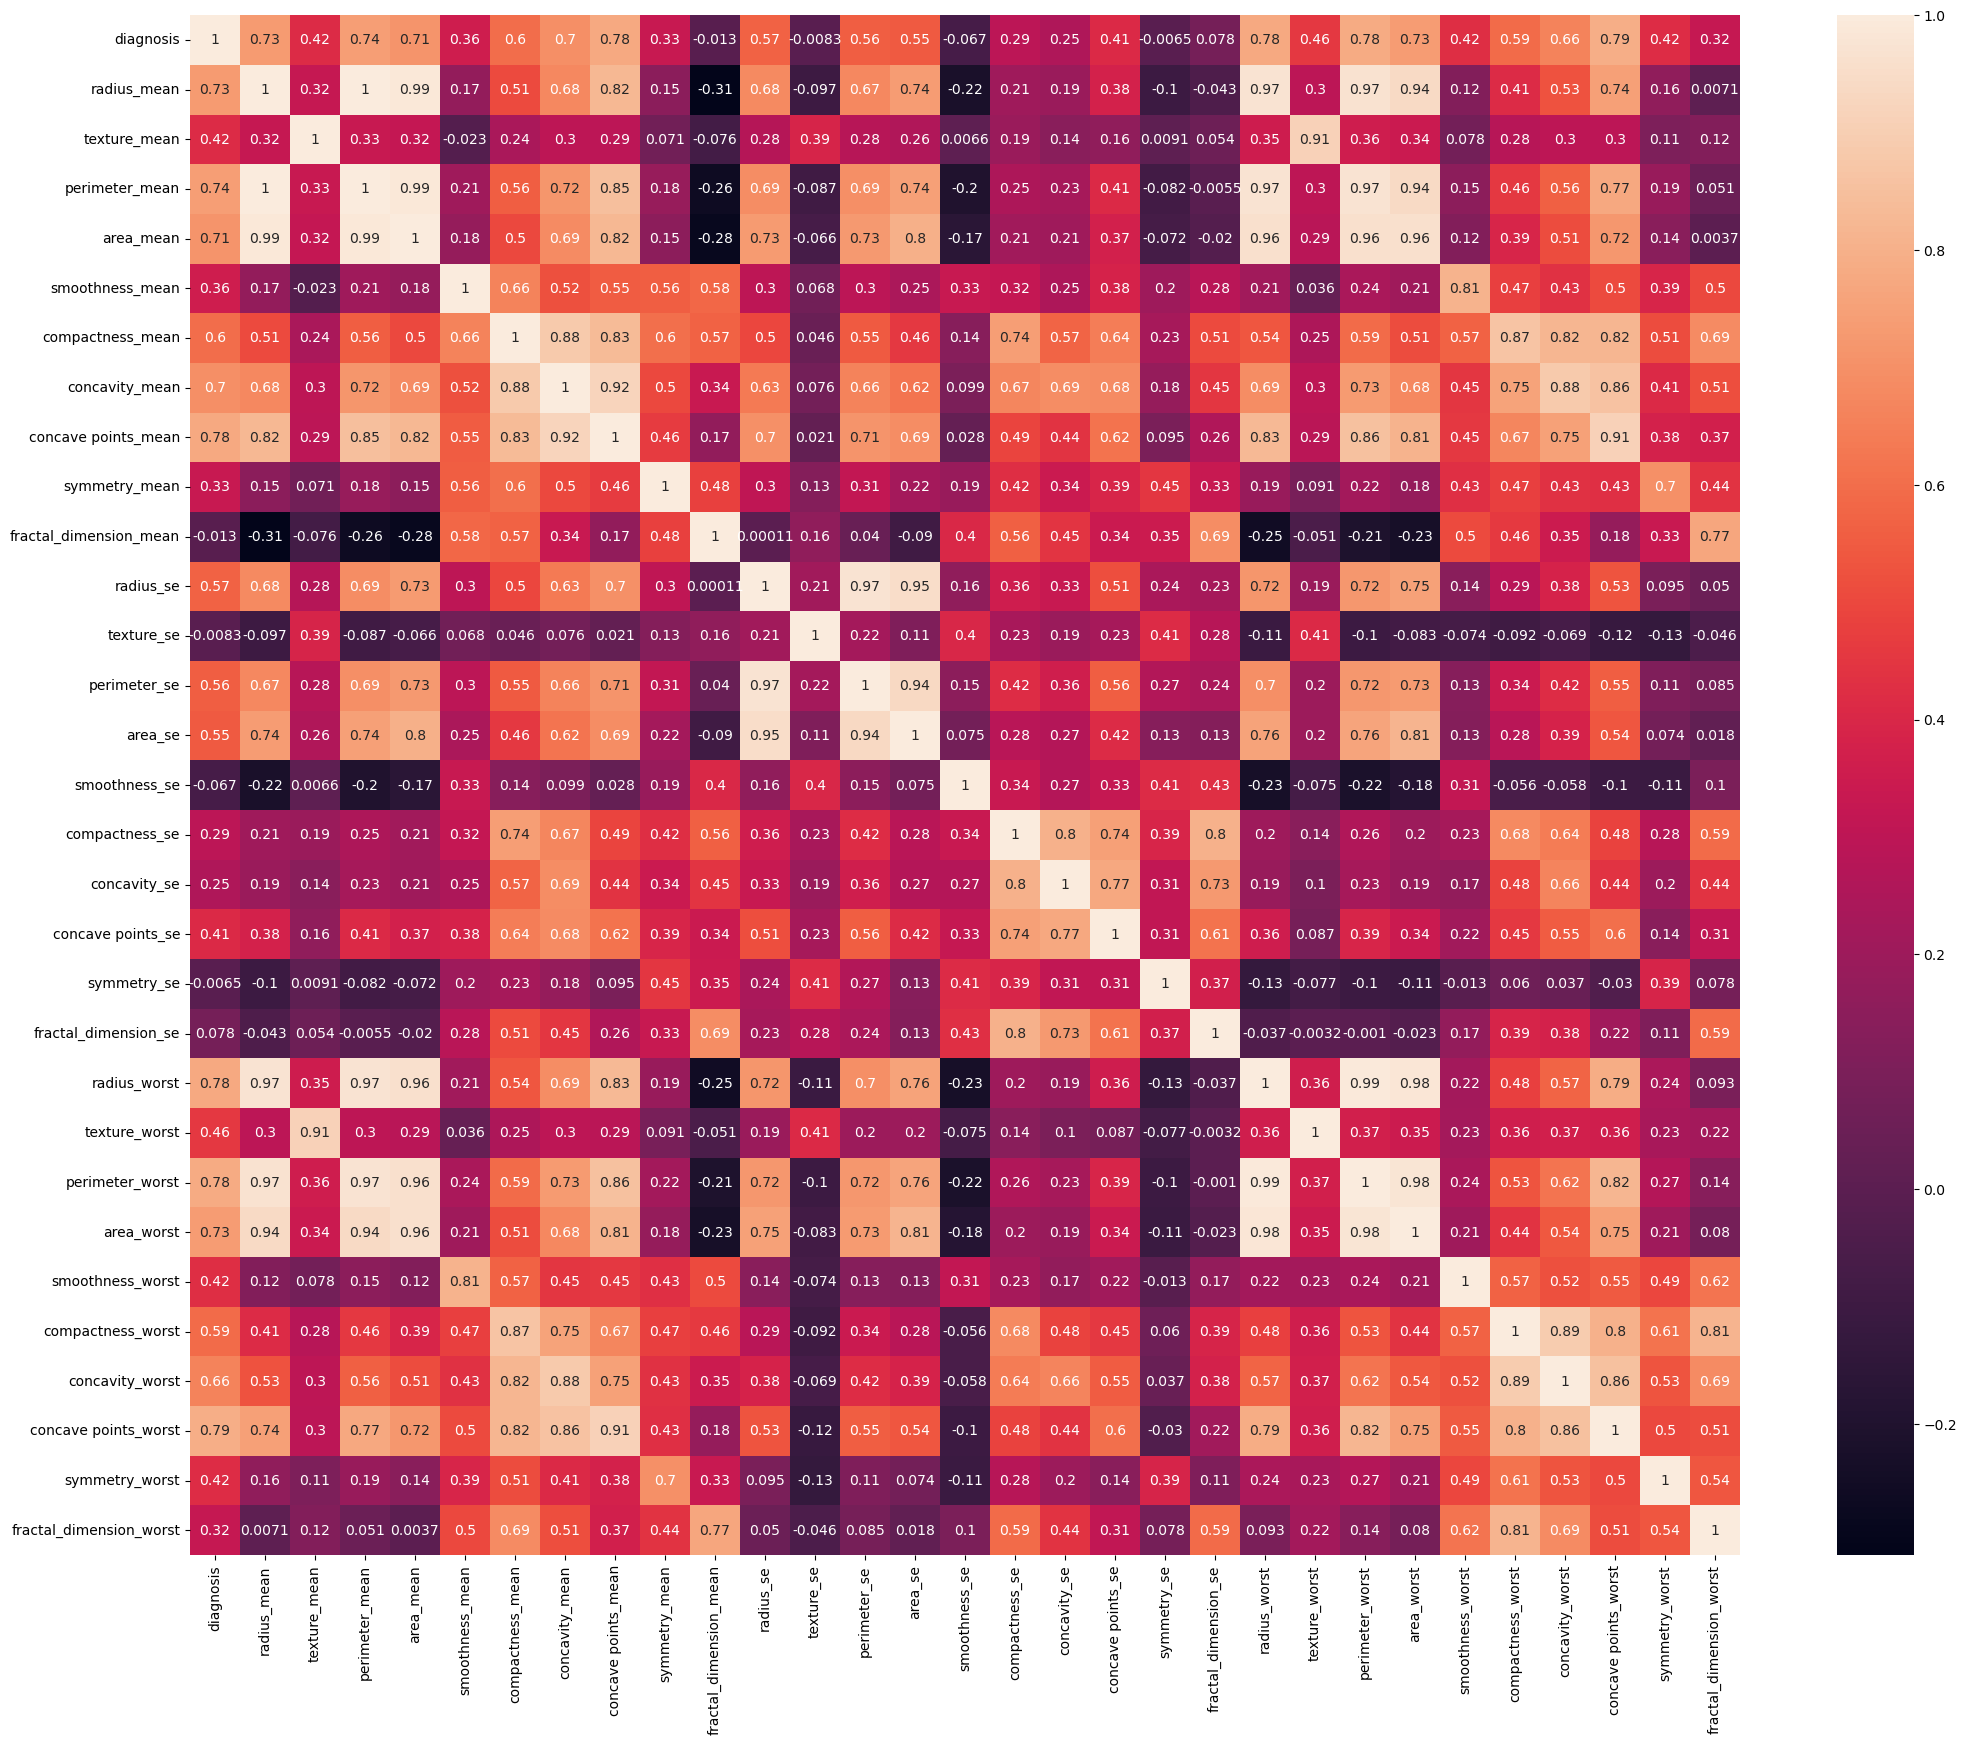

In [662]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [665]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [666]:
x.shape

(569, 30)

In [667]:
y.shape

(569,)

### Observing outliers

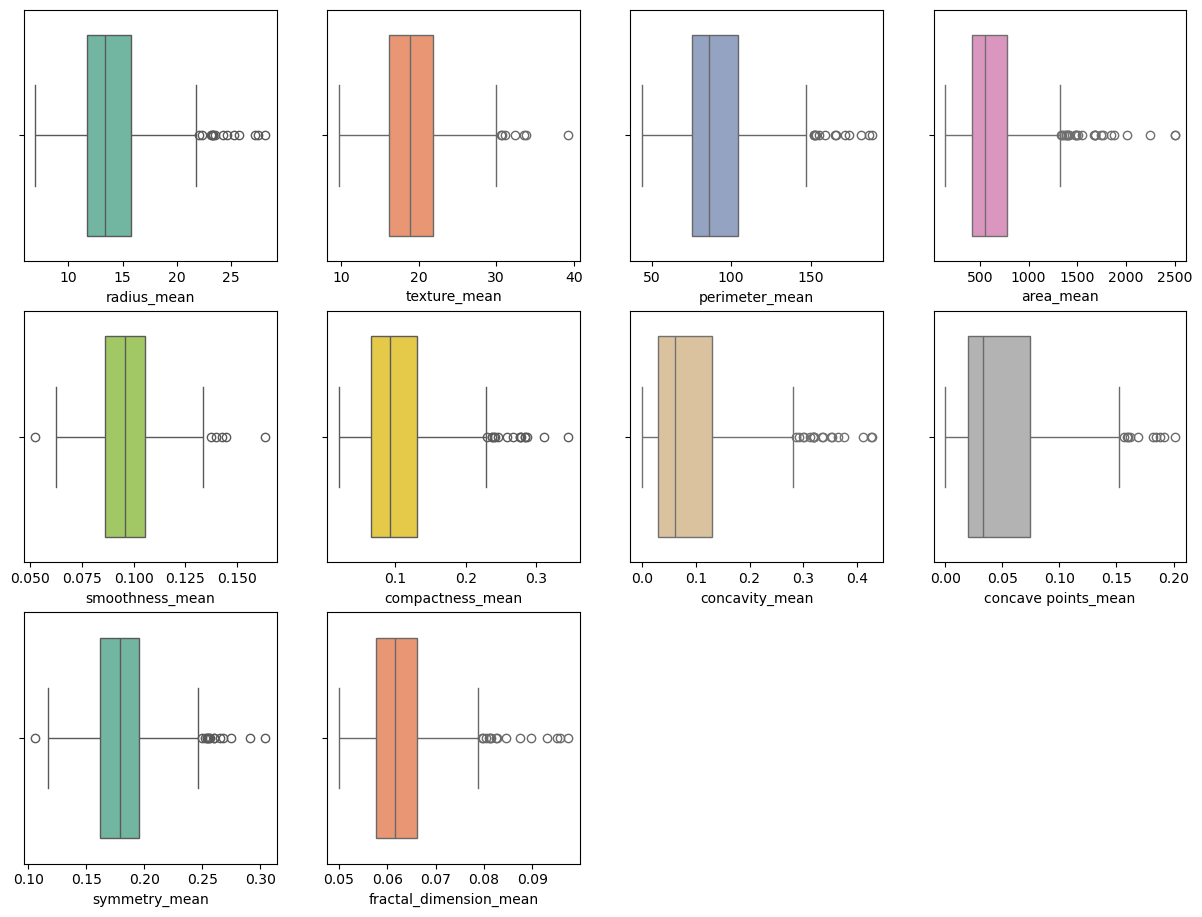

In [669]:
plt.figure(figsize=(15,15))
for i , col in enumerate(['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']):
    plt.subplot(4,4,i+1)
    colors = sns.color_palette("Set2", len(col))
    sns.boxplot(df,x=col,color=colors[i])

plt.show()


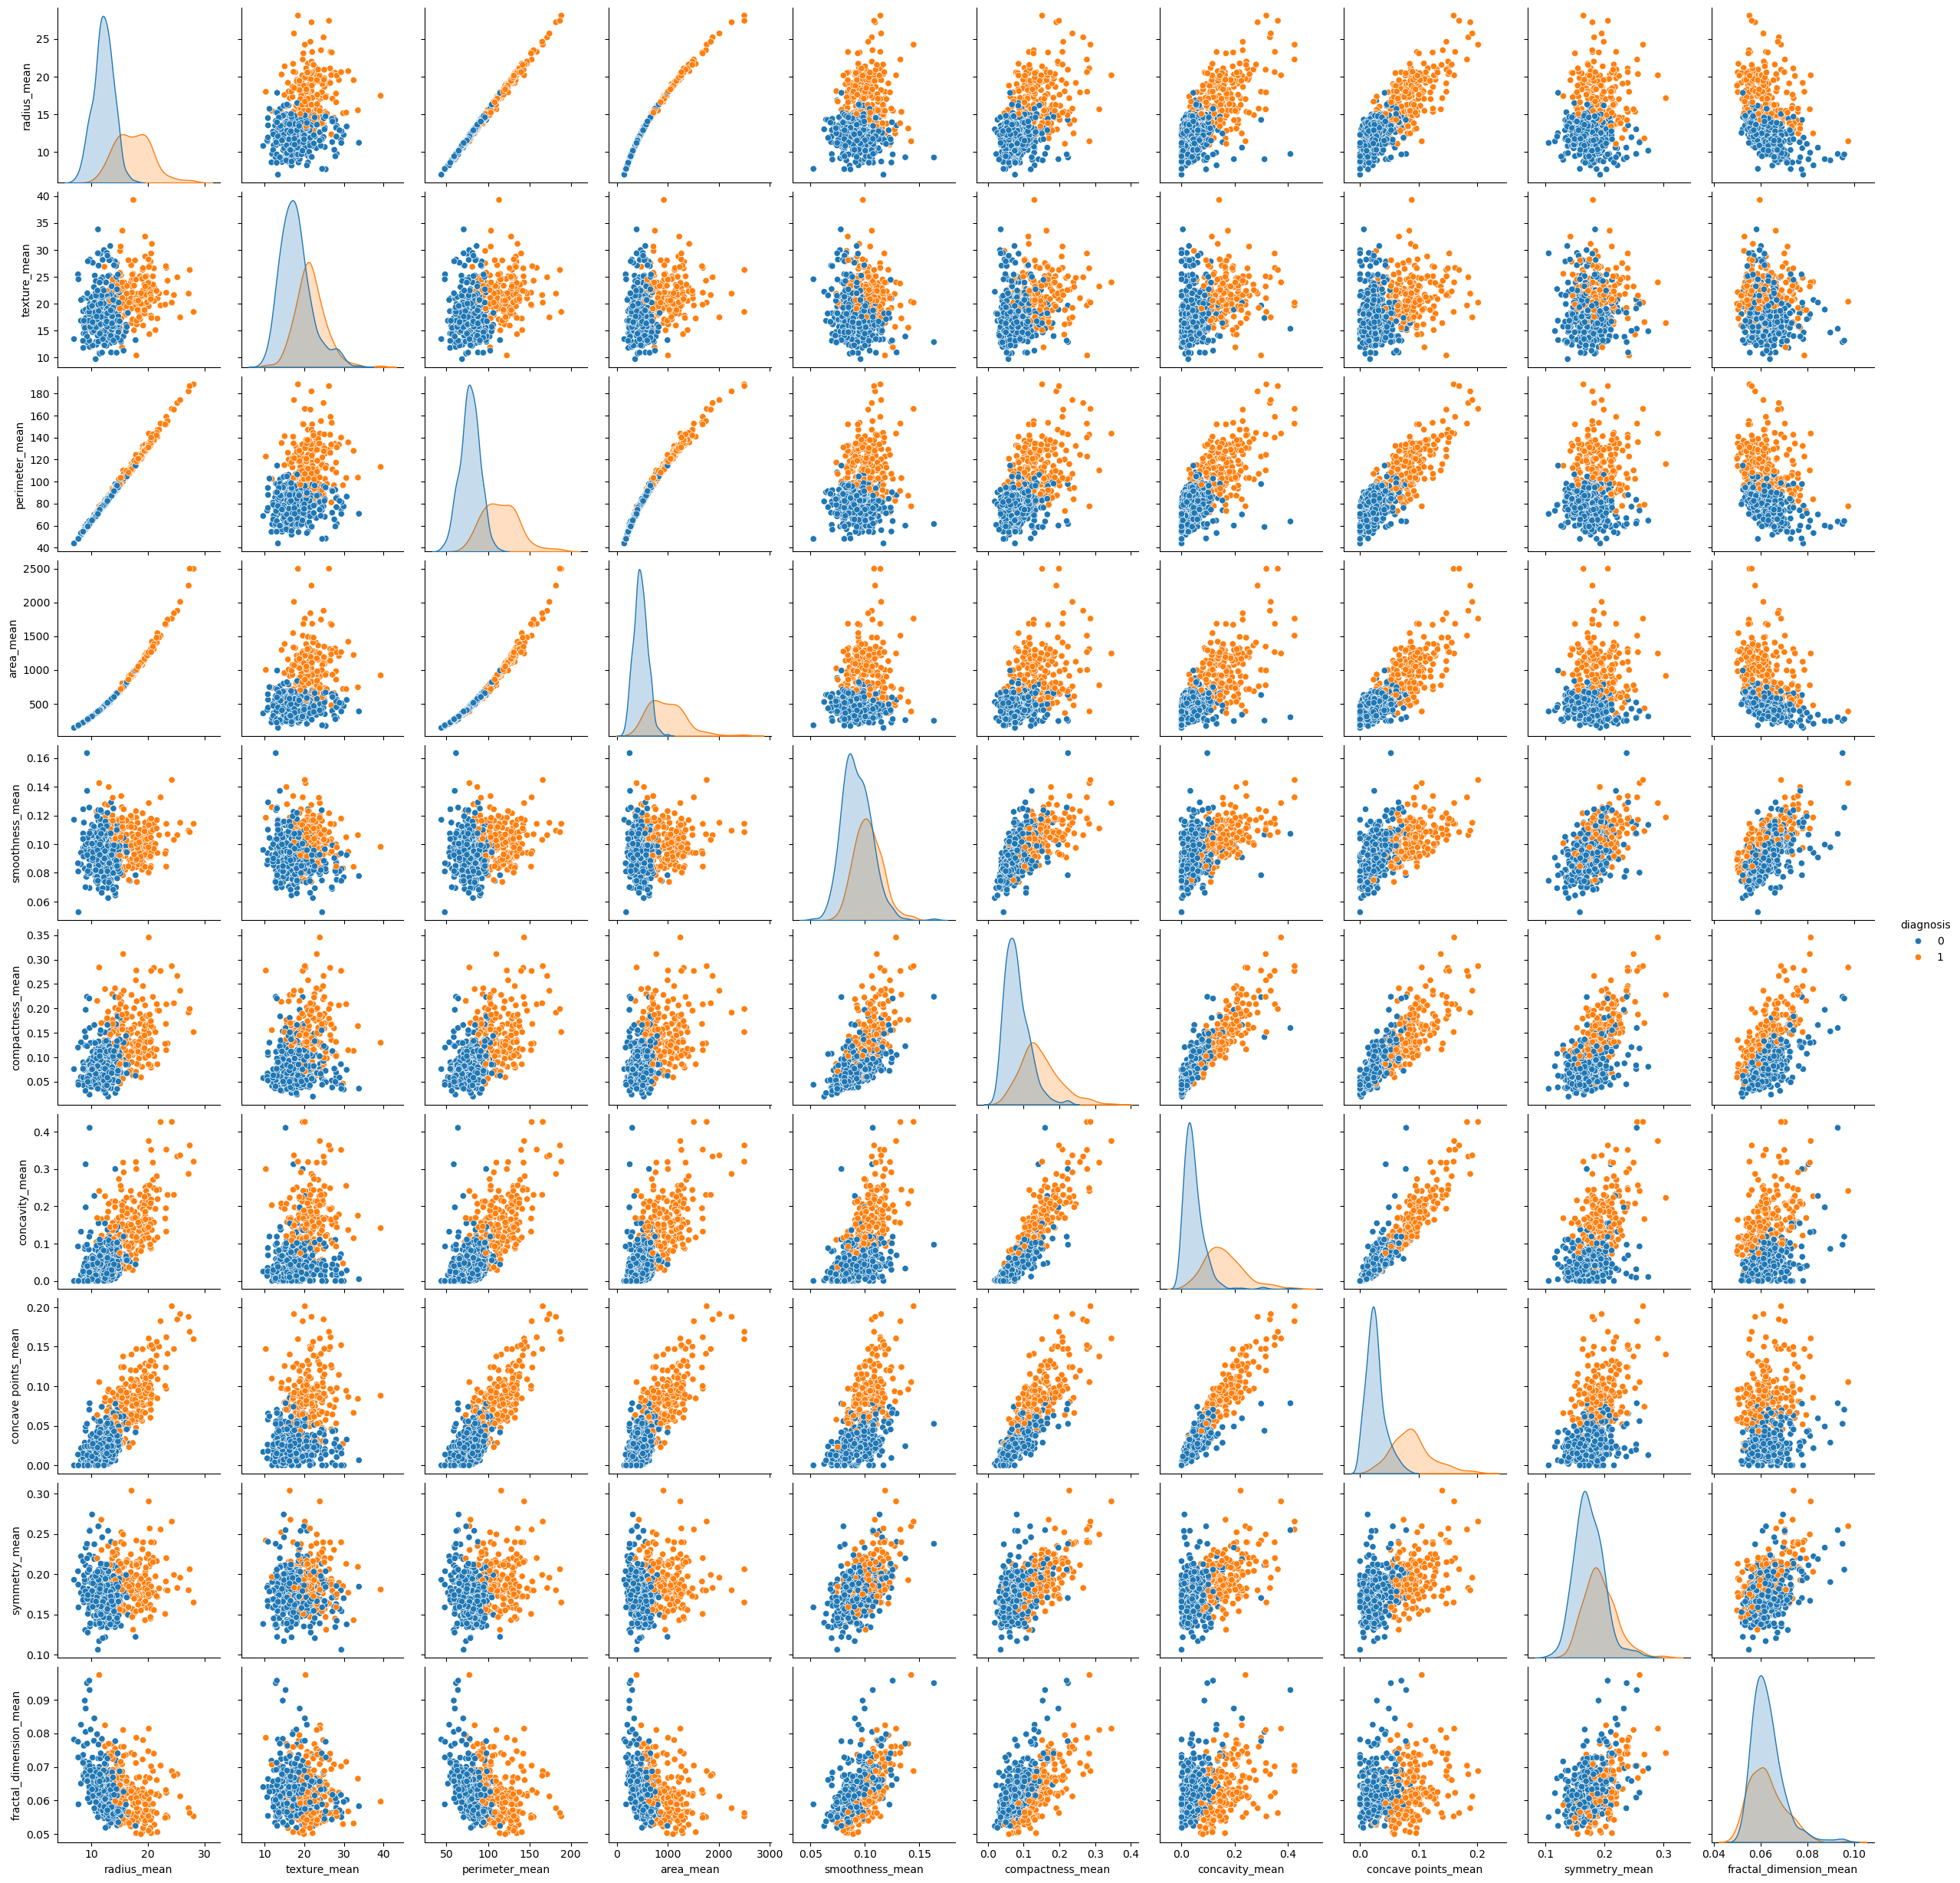

In [670]:
sns.pairplot(df,hue='diagnosis',vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean'])
plt.show()

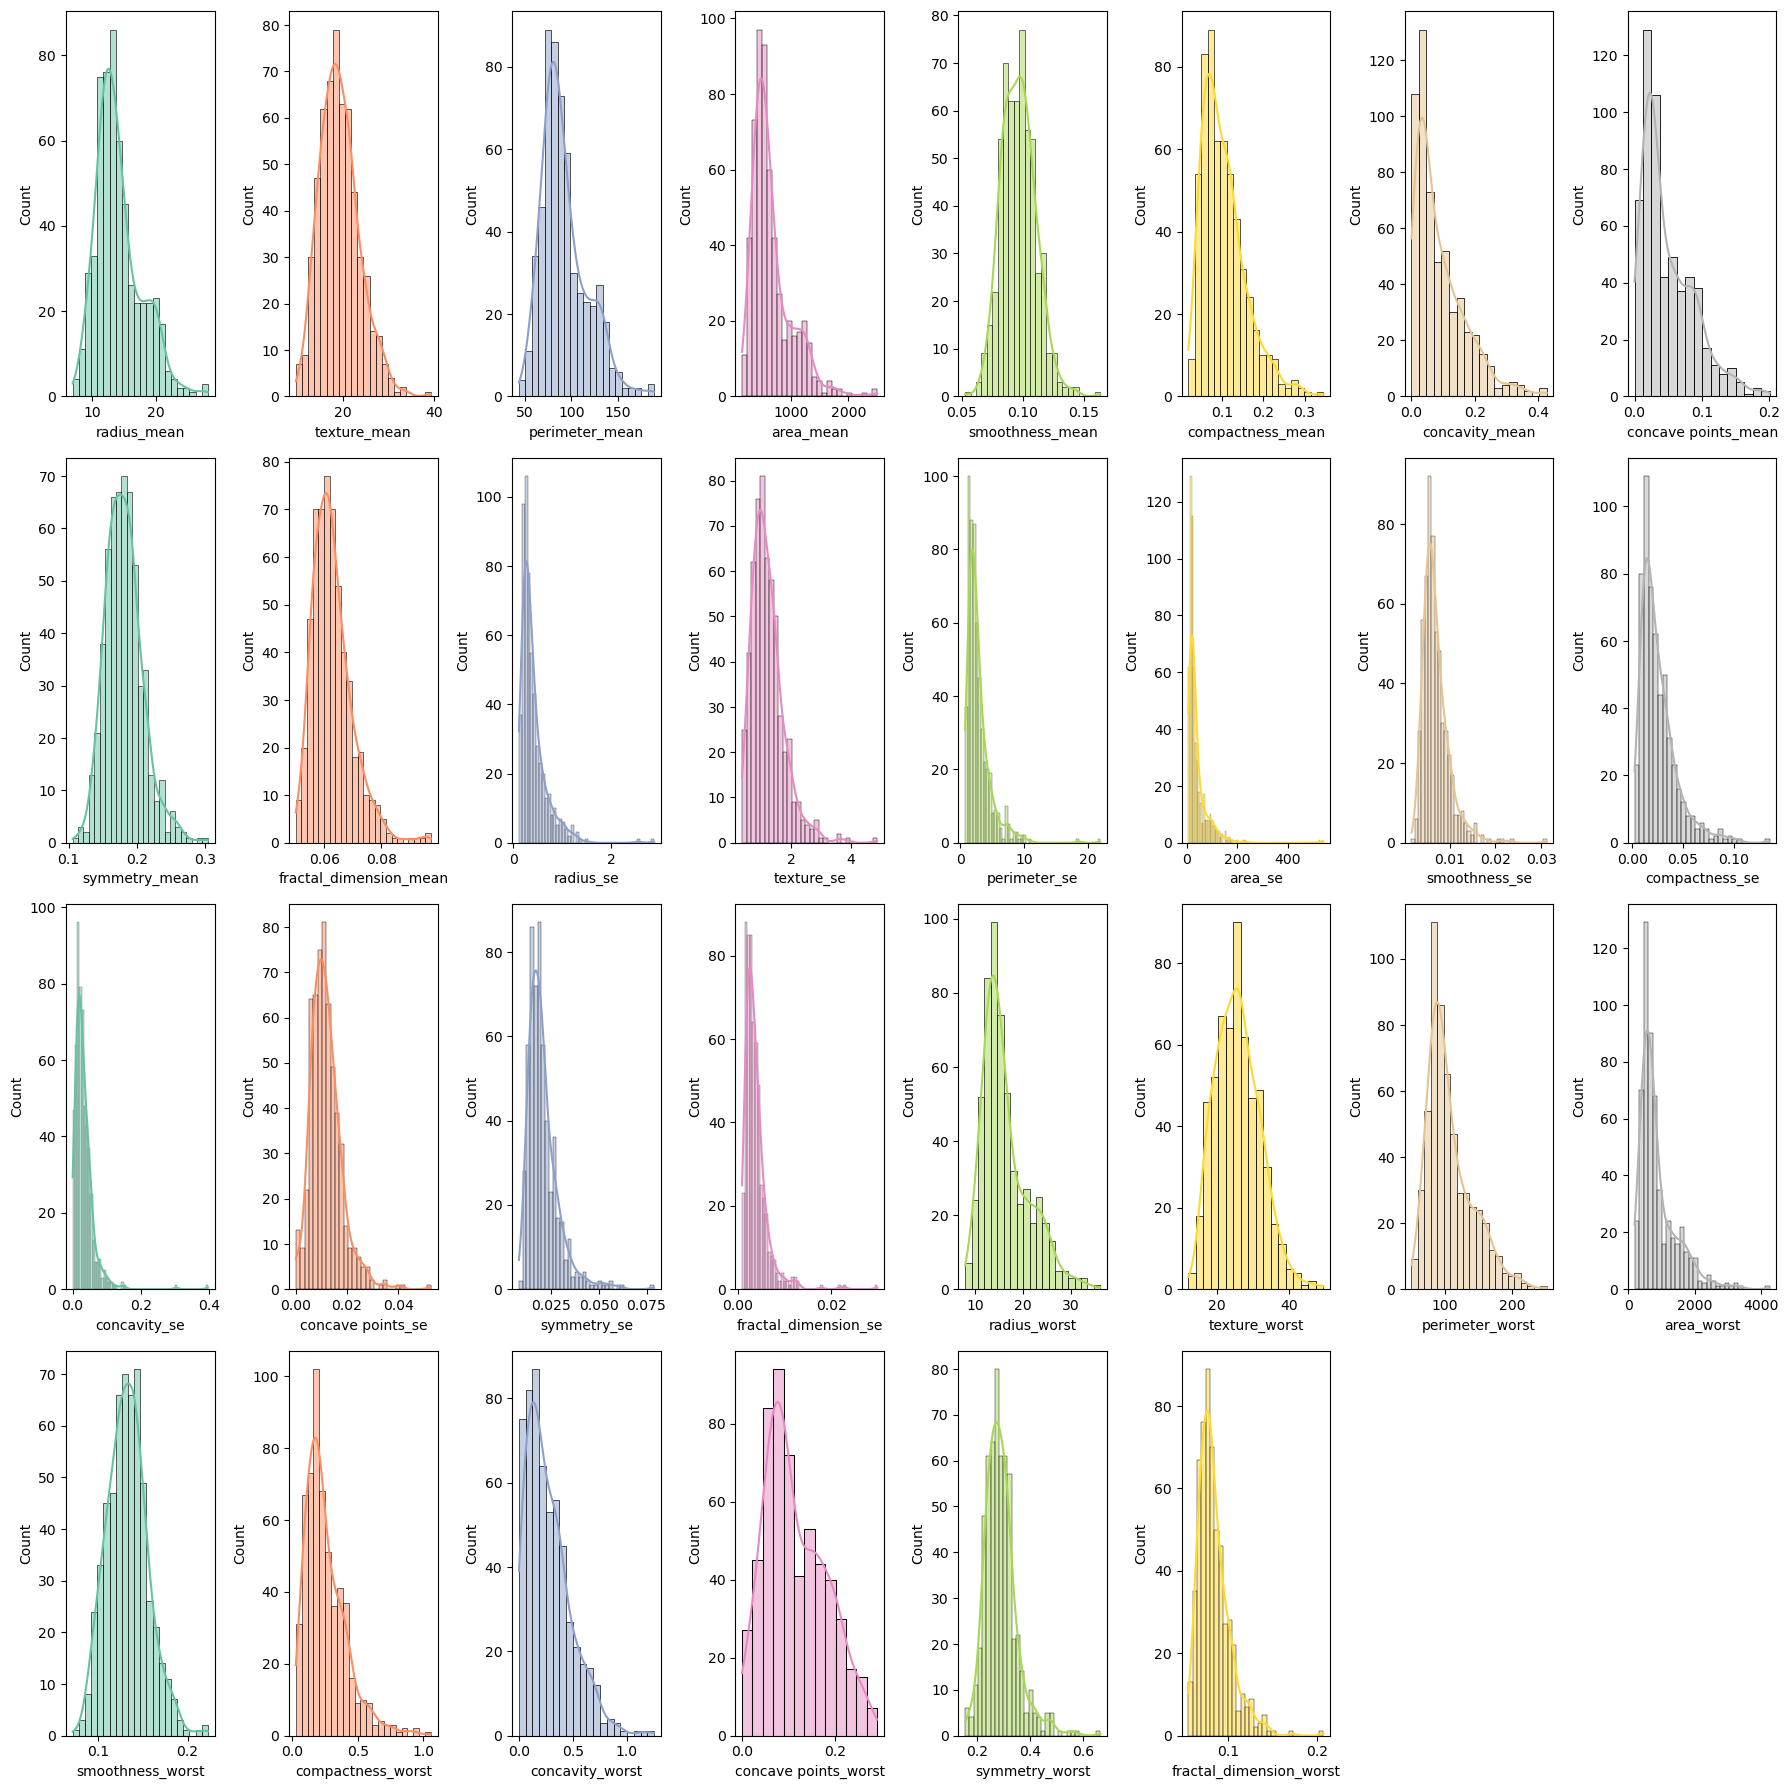

In [671]:
columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
           'smoothness_mean', 'compactness_mean', 'concavity_mean', 
           'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
           'smoothness_se', 'compactness_se', 'concavity_se', 
           'concave points_se', 'symmetry_se', 'fractal_dimension_se',
           'radius_worst', 'texture_worst', 'perimeter_worst', 
           'area_worst', 'smoothness_worst', 'compactness_worst', 
           'concavity_worst', 'concave points_worst', 'symmetry_worst', 
           'fractal_dimension_worst']
colors = sns.color_palette("Set2", len(columns))

plt.figure(figsize=(18, 18))

for i, col in enumerate(columns):
    plt.subplot(4, 8, i + 1) 
    sns.histplot(data=df, x=col, color=colors[i],kde=True)  

plt.tight_layout()  
plt.show()

### Build Model

In [673]:
x.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [674]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [675]:
from sklearn.model_selection import train_test_split

In [676]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [677]:
from sklearn.preprocessing import StandardScaler

In [679]:
sc=StandardScaler()

In [683]:
x_train=sc.fit_transform(x_train)
x_train
                

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [684]:
x_test=sc.transform(x_test)
x_test

array([[-0.21395901,  0.3125461 , -0.14355187, ...,  1.37043754,
         1.08911166,  1.53928319],
       [-0.26750714,  1.461224  , -0.32955207, ..., -0.84266106,
        -0.71577388, -0.88105993],
       [-0.03922298, -0.86770223, -0.10463112, ..., -0.505318  ,
        -1.20298225, -0.92494342],
       ...,
       [-0.51270124, -1.69096186, -0.54095317, ..., -0.12632201,
         0.33773512, -0.42872244],
       [-0.17732081, -2.01395163, -0.17345939, ..., -0.62875108,
        -0.29500302, -0.65432858],
       [ 1.5305829 , -0.26300709,  1.57961296, ...,  1.6694843 ,
         1.18085869,  0.48889253]])

## KNN Model

In [686]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':range(1,21),'metric':['euclidean','manhattan','minkowski'],'weights':['uniform','distance']}
grid_search=GridSearchCV(KNeighborsClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train,y_train)
print("Best Parameters: ",grid_search.best_params_)

Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [687]:
KNN=KNeighborsClassifier(n_neighbors=4,metric='manhattan',weights='distance')
KNN.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [689]:
y_pred=KNN.predict(x_test)

#### Accuracy

In [691]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.96


#### Cross-Validation

In [693]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(KNN,x_train,y_train,cv=10,scoring='accuracy')

In [694]:
print(f"Cross-Validation Scores: {cv_score}")
print(f"Mean Accuracy: {cv_score.mean():.2f}")

Cross-Validation Scores: [0.95348837 0.97674419 0.95348837 0.97674419 0.93023256 0.95348837
 1.         0.97619048 1.         0.92857143]
Mean Accuracy: 0.96


In [695]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### Confusion Matrix

In [697]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[87  3]
 [ 3 50]]


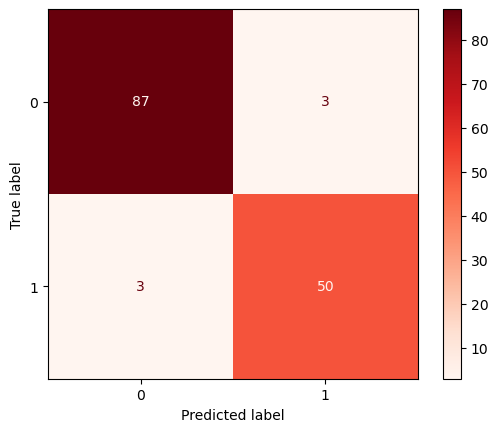

In [698]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")

### Decision Tree

In [700]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

In [701]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [702]:
y_pred=dt.predict(x_test)

#### Accuracy, Confusion Matrix

In [704]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.91
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.92        90
           1       0.82      0.96      0.89        53

    accuracy                           0.91       143
   macro avg       0.90      0.92      0.91       143
weighted avg       0.92      0.91      0.91       143



In [705]:
cm=confusion_matrix(y_test,y_pred)

In [706]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[79 11]
 [ 2 51]]


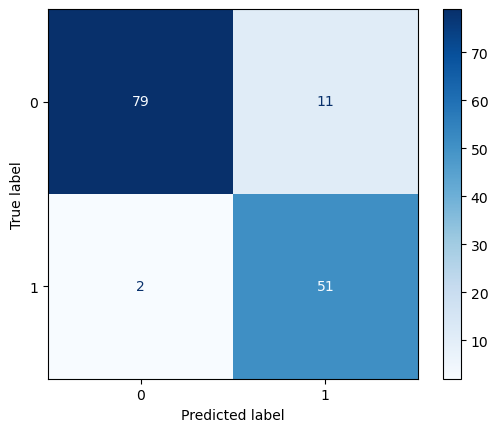

In [707]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

#### Visualization Decision tree

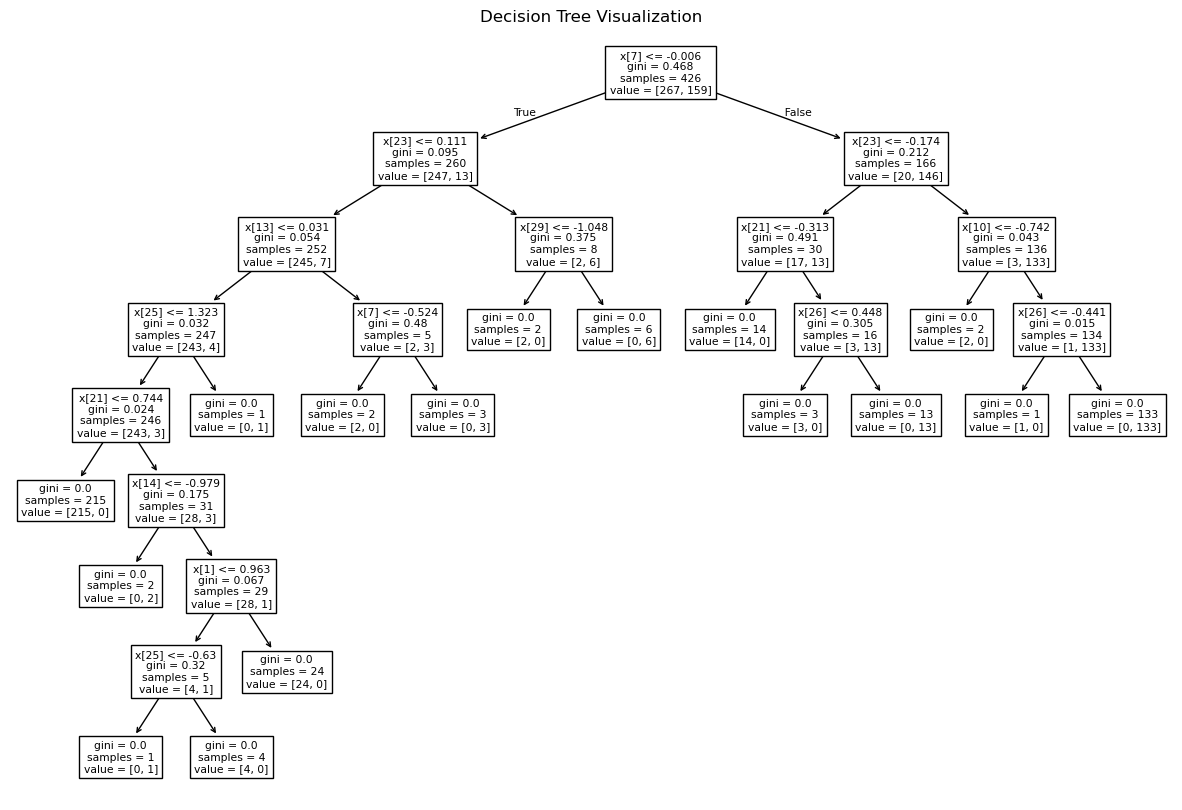

In [709]:
plt.figure(figsize=(15,10))
plot_tree(dt)
plt.title("Decision Tree Visualization")
plt.show()

#### GridSearchCV, Decision tree

In [711]:
from sklearn.model_selection import GridSearchCV

In [712]:
dt=DecisionTreeClassifier()

In [713]:
param_grid={
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,10,50,None],
    'min_samples_split':[2,5,10,None],
    'min_samples_leaf':[1,2,3,4,6,None]
}

In [714]:
grid_search=GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packa

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 50, None],
                         'min_samples_leaf': [1, 2, 3, 4, 6, None],
                         'min_samples_split': [2, 5, 10, None]},
             scoring='accuracy', verbose=1)

In [715]:
print("Best Hyperparameters: ",grid_search.best_params_)
print("Best Cross-Validation Accuracy: ",grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Cross-Validation Accuracy:  0.9365526675786594


In [716]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_leaf=3,min_samples_split=5)

In [717]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=3,
                       min_samples_split=5)

In [718]:
y_pred=dt.predict(x_test)

#### Accuracy Score and Confusion Matrix

In [720]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 0.96
classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        90
           1       0.93      0.96      0.94        53

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [721]:
cm=confusion_matrix(y_test,y_pred)

In [722]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[86  4]
 [ 2 51]]


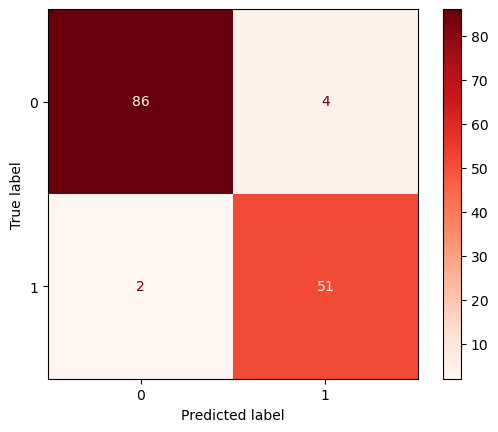

In [723]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Reds")

#### Visualization Decision tree

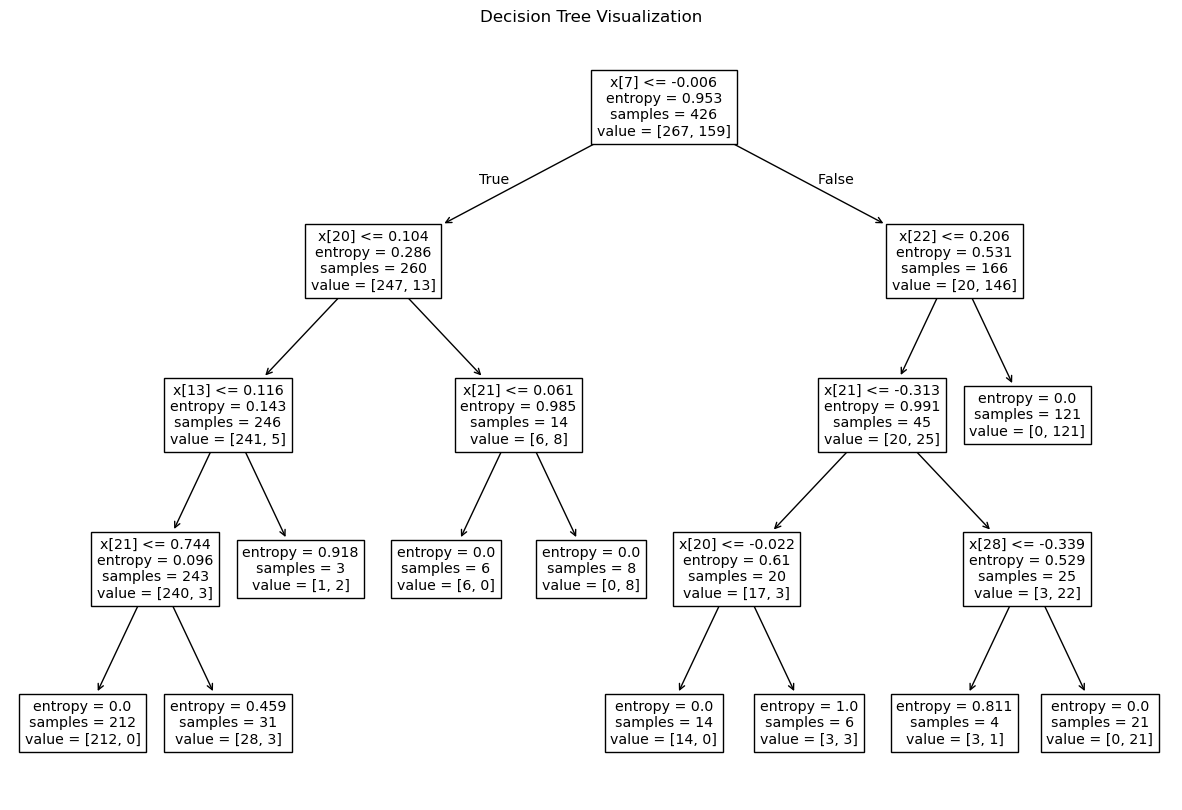

In [725]:
plt.figure(figsize=(15,10))
plot_tree(dt)
plt.title("Decision Tree Visualization")
plt.show()

### Logistic Regresion

In [727]:
from sklearn.linear_model import LogisticRegression

In [728]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [729]:
y_pred=log_reg.predict(x_test)

#### Accuracy Score

In [731]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [892]:
log_reg = LogisticRegression(max_iter=10000, random_state=42)

#### GridSearchCV

In [894]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', None], 
    'C': [0.01, 0.1, 1, 10, 100],               
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver =

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [896]:
log_clf=LogisticRegression(max_iter=10000,C=1,penalty='l1',solver='saga')

In [898]:
log_clf.fit(x_train,y_train)

LogisticRegression(C=1, max_iter=10000, penalty='l1', solver='saga')

In [900]:
y_pred=log_clf.predict(x_test)

#### Accuracy Score, Confusion Matrix

In [890]:
print('Accuracy score: ',accuracy_score(y_test,y_pred))

Accuracy score:  0.951048951048951


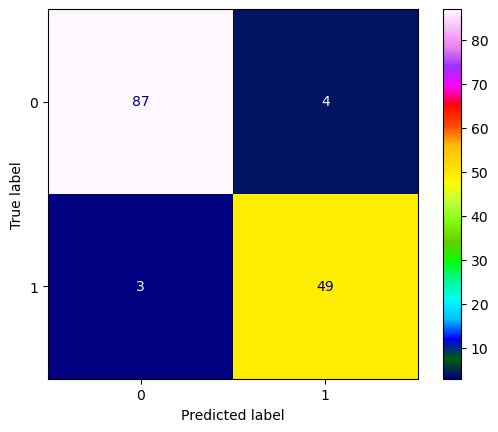

In [909]:
cm=confusion_matrix(y_pred,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='gist_ncar')

#### Cross-Validation, Confusion Matrix

In [733]:
print(f"Cross-Validation Scores: {cv_score}")
print(f"Mean Accuracy: {cv_score.mean():.2f}")

Cross-Validation Scores: [0.95348837 0.97674419 0.95348837 0.97674419 0.93023256 0.95348837
 1.         0.97619048 1.         0.92857143]
Mean Accuracy: 0.96


In [734]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[87  3]
 [ 3 50]]


In [735]:
cv_score=cross_val_score(log_reg,x_train,y_train,cv=5,scoring='accuracy')

In [736]:
print(f"Cross-Validation Scores: {cv_score}")
print(f"Mean Accuracy: {cv_score.mean():.2f}")

Cross-Validation Scores: [0.98837209 0.98823529 0.95294118 1.         0.97647059]
Mean Accuracy: 0.98


In [737]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[87  3]
 [ 3 50]]


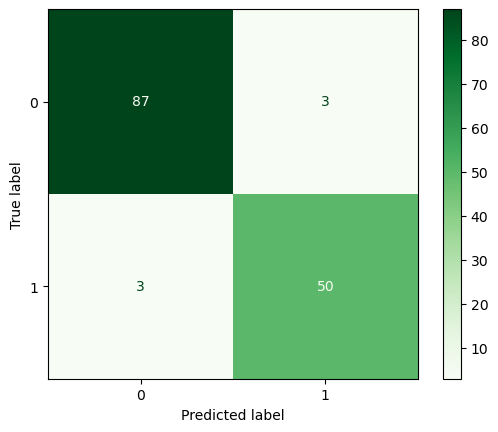

In [738]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Greens")

### Ensemble Learning

#### Voting

In [741]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [742]:
log_clf=LogisticRegression()
dt_clf=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_leaf=3,min_samples_split=5)
knn_clf=KNeighborsClassifier(n_neighbors=4,metric='manhattan',weights='distance')

In [743]:
voting_clf=VotingClassifier(
    estimators=[
        ('log_reg',log_clf),
        ('decision_tree',dt_clf),
        ('KNN',knn_clf)
    ],
    voting='hard',
    weights=[2,2,1]
)
voting_clf.fit(x_train,y_train)
y_pred=voting_clf.predict(x_test)

#### Accuracy Score, Confusion Matrix

In [745]:
print("Voting Classifier Accuracy: ",accuracy_score(y_test,y_pred))

Voting Classifier Accuracy:  0.972027972027972


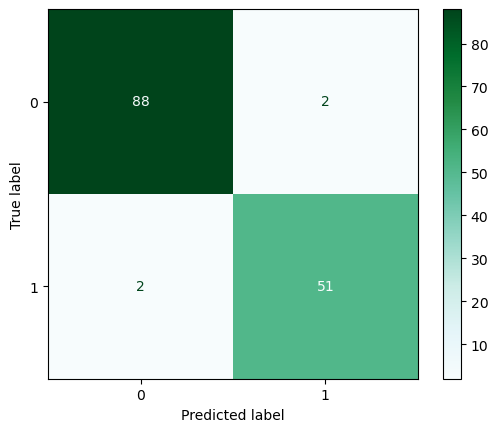

In [746]:
cm=confusion_matrix(y_pred,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuGn')

### Bagging

### Random Forest

In [749]:
from sklearn.ensemble import RandomForestClassifier

#### GridSearchCV

In [751]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [752]:
rf_clf=RandomForestClassifier(n_estimators=100,max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=10)

In [753]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10)

In [754]:
y_pred=rf_clf.predict(x_test)

#### Accuracy Score, Confusion Matrix

In [756]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.972027972027972


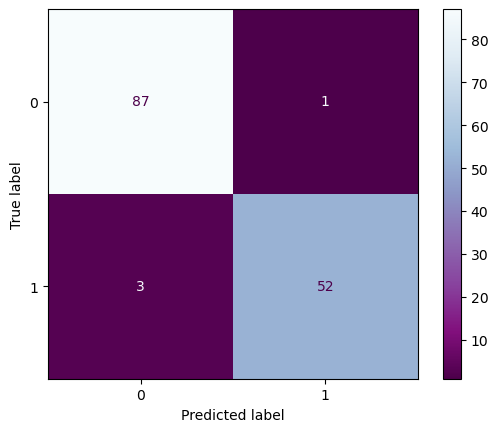

In [757]:
cm=confusion_matrix(y_pred,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='BuPu_r')

#### Importance of all Features

                    Feature  Importance
27     concave points_worst    0.158078
22          perimeter_worst    0.142651
7       concave points_mean    0.119744
23               area_worst    0.095826
20             radius_worst    0.092967
6            concavity_mean    0.056262
0               radius_mean    0.045067
13                  area_se    0.045024
2            perimeter_mean    0.039959
3                 area_mean    0.035747
26          concavity_worst    0.033148
25        compactness_worst    0.017548
12             perimeter_se    0.015794
10                radius_se    0.014453
21            texture_worst    0.013941
1              texture_mean    0.012824
24         smoothness_worst    0.009539
28           symmetry_worst    0.009252
29  fractal_dimension_worst    0.007067
16             concavity_se    0.006500
5          compactness_mean    0.004553
11               texture_se    0.004498
8             symmetry_mean    0.003644
19     fractal_dimension_se    0.003054


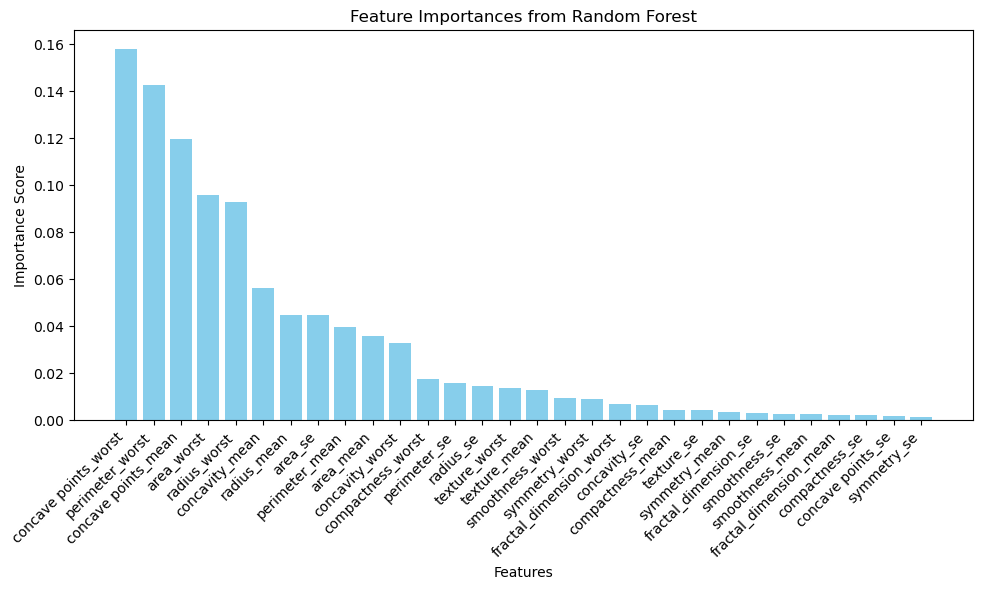

In [759]:
feature_importances = rf_clf.feature_importances_
importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45,ha='right',fontsize=10)
plt.tight_layout()
plt.show()

### Boosting

### Gradient Boosting

In [762]:
from sklearn.ensemble import GradientBoostingClassifier

#### GridSearchCV

In [764]:
gb_clf=GradientBoostingClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=gb_clf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\ProgramData\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 1.0}


In [765]:
gb_reg = GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=3,min_samples_split=2,subsample=1.0)
gb_reg.fit(x_train, y_train)
y_pred=gb_reg.predict(x_test)

#### Accuracy Score, Confusion Matrix

In [767]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.958041958041958


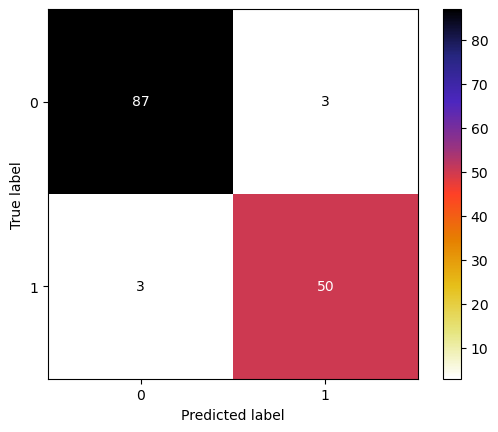

In [768]:
cm=confusion_matrix(y_pred,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='CMRmap_r')

### Support vector machine

In [770]:
from sklearn.svm import SVC

#### GridSearchCV

In [772]:
svm_clf=SVC()
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}
grid_search = GridSearchCV(estimator=svm_clf, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [773]:
svm_clf = SVC(kernel='rbf', C=10,gamma=0.01)
svm_clf.fit(x_train,y_train)
y_pred=svm_clf.predict(x_test)

#### Accuracy Score, Confusion Matrix 

In [775]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.9790209790209791


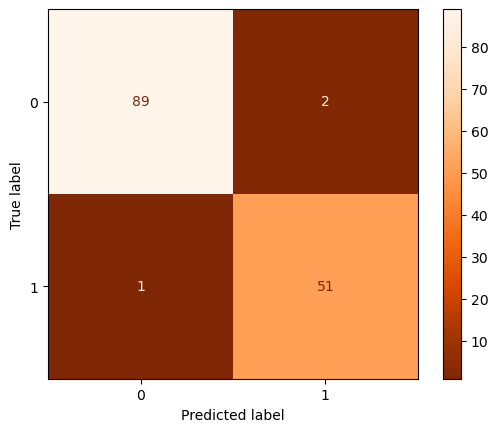

In [776]:
cm=confusion_matrix(y_pred,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges_r')

#### Cross-Validation

In [778]:
cv_scores = cross_val_score(svm_clf, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Scores: [1.         0.97647059 0.95294118 1.         1.        ]
Mean Accuracy: 0.99


#### Confusion Matrix

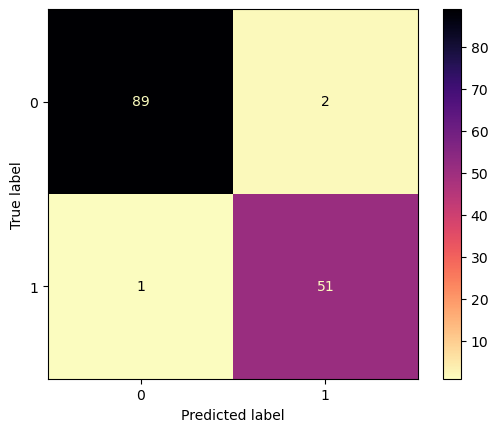

In [780]:
cm=confusion_matrix(y_pred,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma_r')

### Stacking

In [782]:
from sklearn.ensemble import StackingClassifier

In [783]:
base_learners = [
    ('rf_clf',RandomForestClassifier(n_estimators=100,max_depth=10,max_features='sqrt',min_samples_leaf=4,min_samples_split=10)),
    ('gb_reg' , GradientBoostingClassifier(n_estimators=150, learning_rate=0.2, max_depth=3,min_samples_split=2,subsample=1.0)),
    ('svm_clf',SVC(kernel='rbf', C=10,gamma=0.01))
]
meta_model=SVC(kernel='rbf', C=10,gamma=0.01)
stacking_reg =StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=10)
stacking_reg.fit(x_train, y_train)
y_pred = stacking_reg.predict(x_test)

#### Accuracy Score, Confusion Matrix

In [785]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.9790209790209791


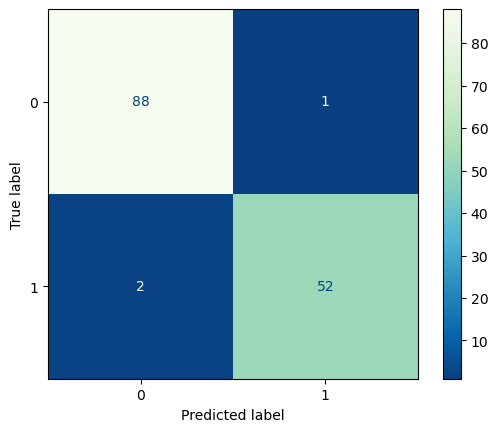

In [786]:
cm=confusion_matrix(y_pred,y_test)
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='GnBu_r')